In [86]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [87]:
df = pd.read_csv('data/census.csv')
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA - descriptive analysis

In [88]:
# check the shape of the data
df.shape

(32561, 15)

In [89]:
# check for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlgt           32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [90]:
# check for missing values
df.isna().sum()

age                0
 workclass         0
 fnlgt             0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

In [91]:
# check for data description
df.describe()

,age,fnlgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [92]:
cat_columns = [col for col in df.columns if df[col].dtype == 'object']
num_columns = [col for col in df.columns if col not in cat_columns]

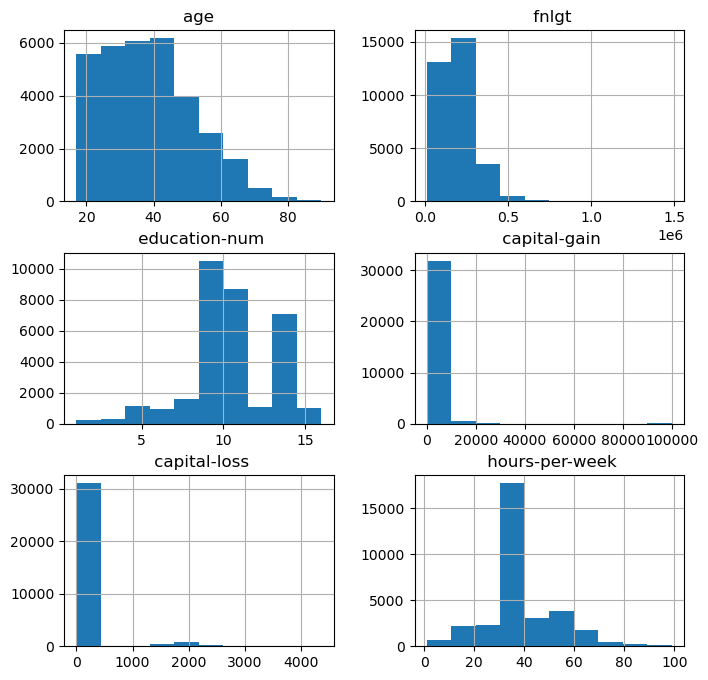

In [93]:
# check data histogram for numeric columns
df[num_columns].hist(figsize = (8,8));

1. The features `age`, `fnlgt` and `capital-loss` are heavily skewed towards left.
2. The feature `education-num` is heavily skewed towards right.
3. The feature `hours-per-week` seems to be normally distributed but slightly skewed wotwards left.

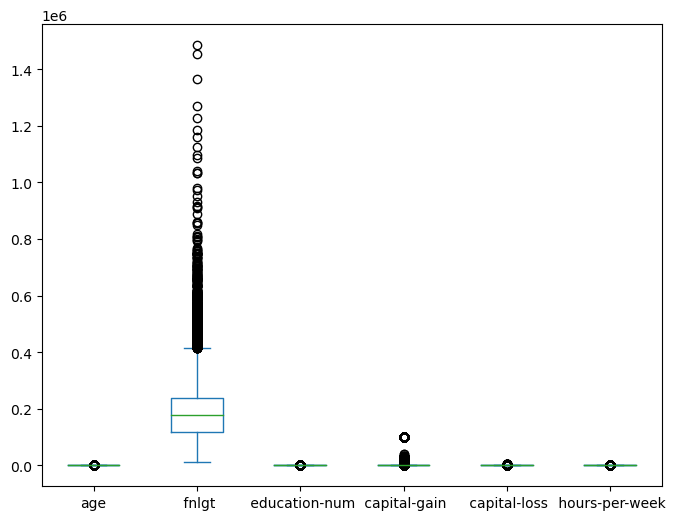

In [94]:
# check data box for numeric columns
df[num_columns].plot.box(figsize = (8,6));

`fnlgt` seems to a lot of outliers. We can investigate it further to understand how they might impact model.

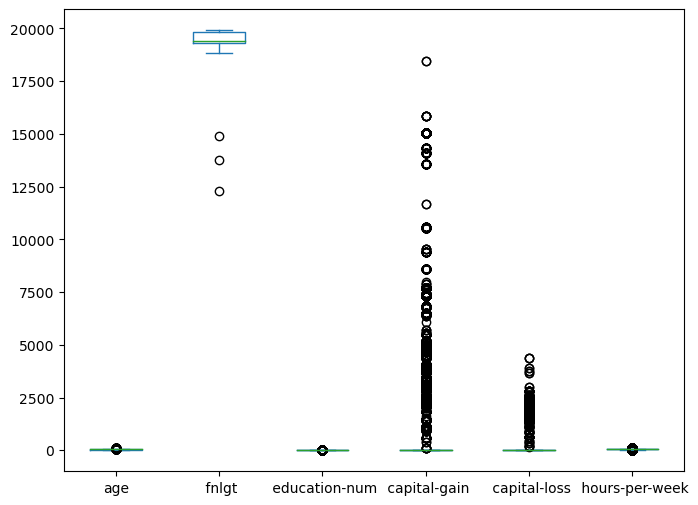

In [95]:
# check data box for numeric columns
inves_col = ['age',
 ' fnlgt',
 ' education-num',
 ' capital-gain',
 ' capital-loss',
 ' hours-per-week']

df[inves_col][df[inves_col]<20000].plot.box(figsize = (8,6));

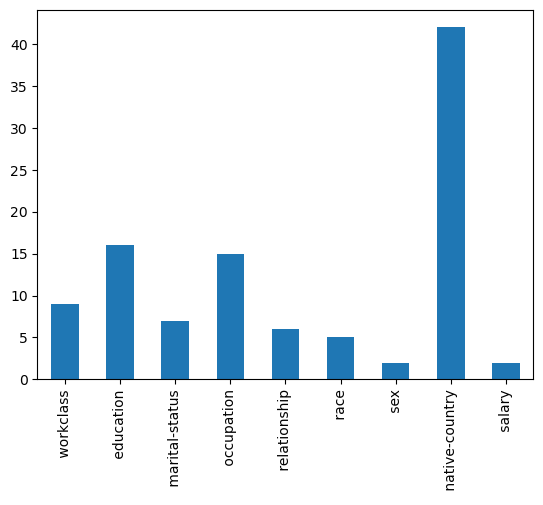

In [96]:
# check cardiniality of the categoricalcolumns
df[cat_columns].nunique().plot.bar();

It seems that there is only feature 'native-country' which can be considered as a high cardiniality feature

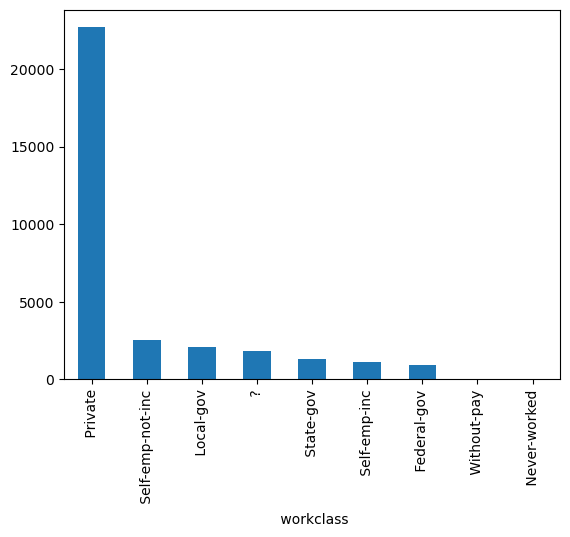

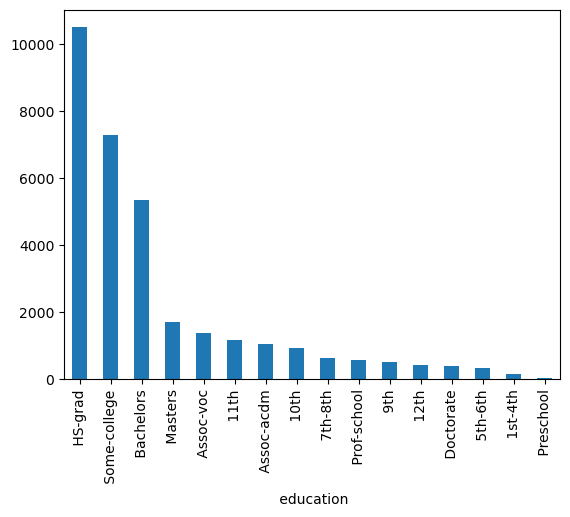

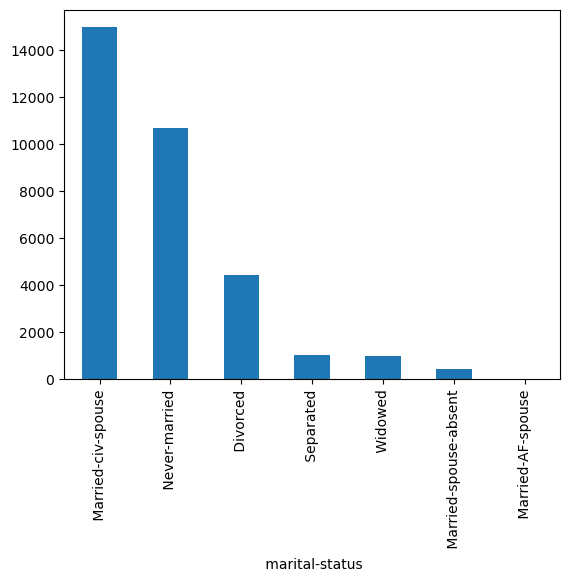

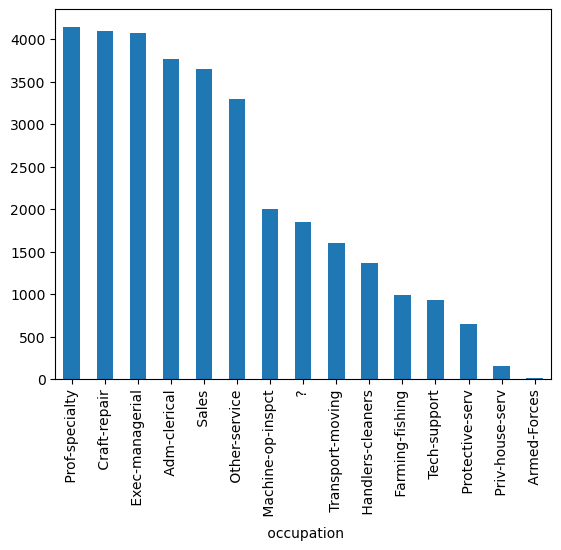

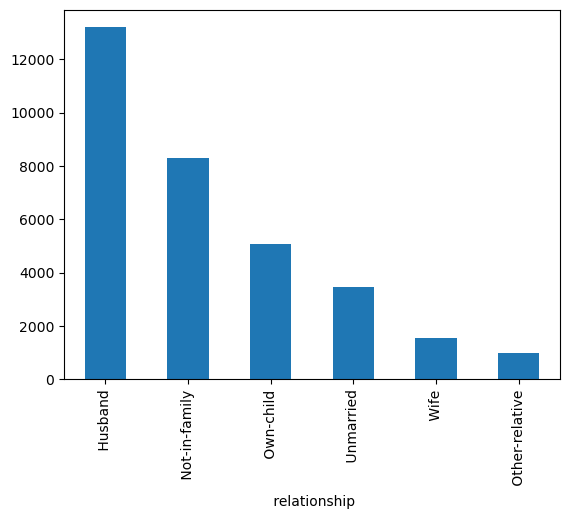

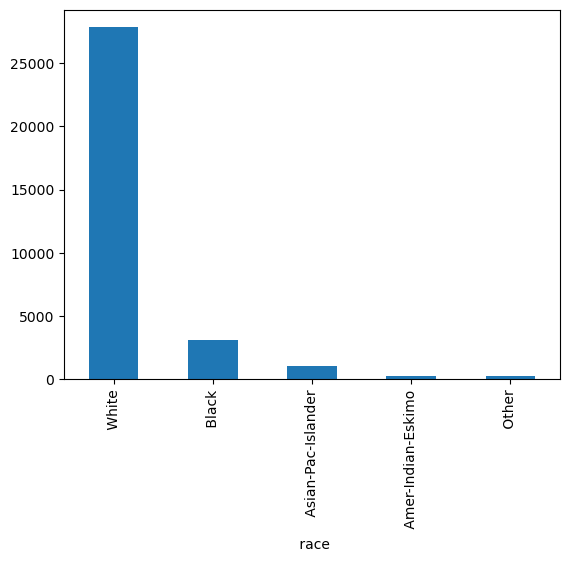

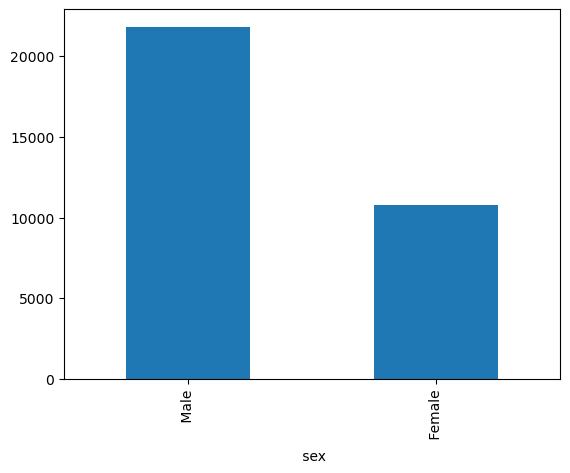

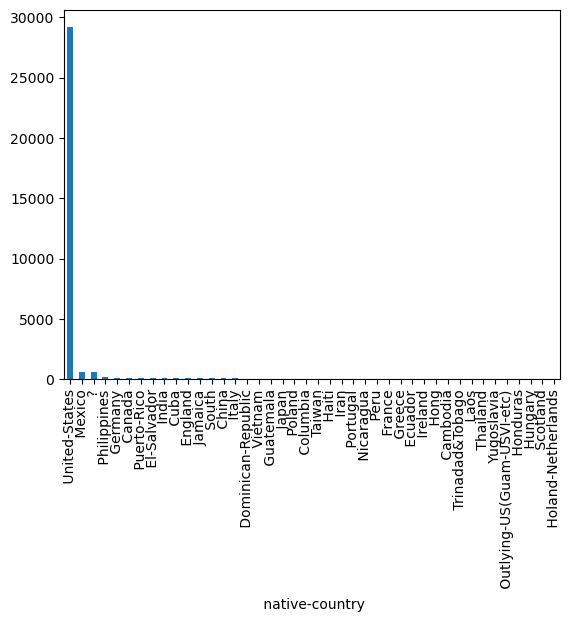

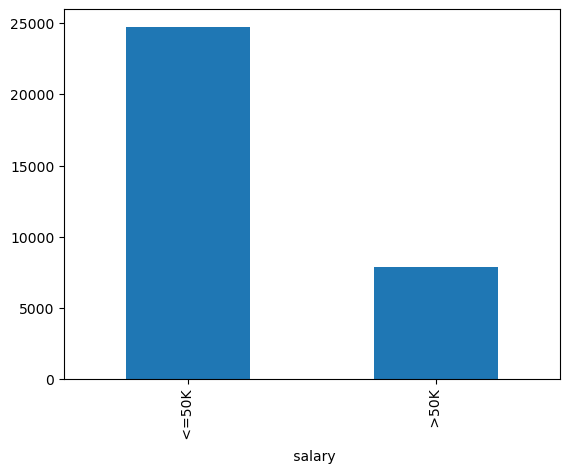

In [97]:
for col in cat_columns:
    df[col].value_counts().plot.bar()
    plt.show()

There are some values in the dataset set tp `?`.

for col in cat_columns:
    print(df[col].unique())

In [99]:
question_mark_count = df.apply(lambda row: row.tolist().count(' ?'), axis=1)

In [100]:
len(question_mark_count[question_mark_count > 0])

2399

In [105]:
df.shape

(32561, 15)

Out of full dataset there are 2399 rows which contains ' ?' values. 
we can replace them with None and then drop the values.

In [107]:
clean_df = df.replace(" ?", None)

In [108]:
clean_df.dropna(inplace=True)

In [109]:
clean_df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [110]:
clean_df.shape

(30162, 15)

In [111]:
# Save the data 
claen_data_path = 'data/clean_census.csv'
clean_df.to_csv(claen_data_path, index=False)